<a href="https://colab.research.google.com/github/farzin23i/SciSchool-Introduction_to_Machine_Learning/blob/main/week2/OnlineSession2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/SciSchool/weak2_

/content/drive/MyDrive/SciSchool/weak2_


In [ ]:
import numpy as np
import pylab as plt
import seaborn as sns
import pandas as pd

In [ ]:
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv ('Copy of Classified Data', index_col='Unnamed: 0')
df.head (10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


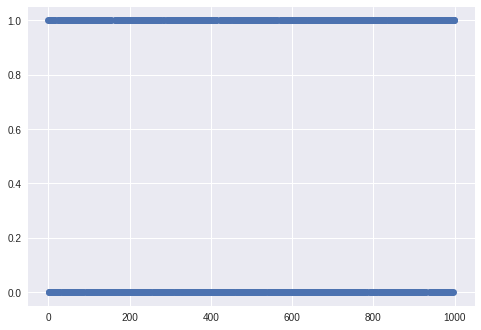

In [ ]:
plt.plot (df['TARGET CLASS'], 'o')

In [ ]:
df['TARGET CLASS'].unique ()

array([1, 0])

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
df.describe ()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [ ]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [ ]:
features = df [['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',]]
classes= df['TARGET CLASS']

In [ ]:
features.items

In [ ]:
# fig, axs= plt.subplots(ncols=4, nrows=1, figsize=(10, 5))
# index = 0
# axs = axs.flatten()
# for k,v in features.items():
#     sns.boxplot(y=k, data=features, ax=axs[index])
#     index += 1
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

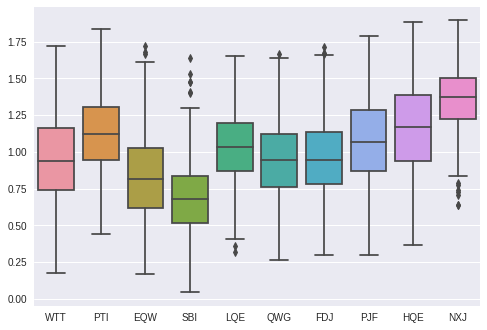

In [ ]:
sns.boxplot (data=features,)

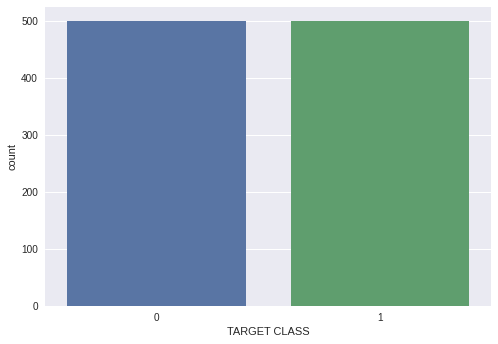

In [ ]:
sns.countplot (x= 'TARGET CLASS', data=df)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
features.columns

RangeIndex(start=0, stop=10, step=1)

In [ ]:
features = pd.DataFrame (scaler.fit_transform(features), columns= features.columns)

In [ ]:
features.describe ()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.141309e-16,-3.198553e-16,-1.181277e-16,-1.766365e-16,-6.170064e-16,2.531308e-17,2.317035e-16,-4.826139e-16,3.438916e-16,4.525824e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(features,df['TARGET CLASS'],
#                                                     test_size=0.30, random_state= 10)

In [ ]:
rnd = np.random.randint (len(df), size=int(0.7*len(df)))

In [ ]:
features.iloc [rnd]

In [ ]:
X_train, X_test, y_train, y_test = features[:700], features[700:], classes[:700], classes[700:]

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit (X_train, y_train)

LogisticRegression()

In [ ]:
pred= lr.predict (X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[137   5]
 [  3 155]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       142
           1       0.97      0.98      0.97       158

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



# K nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
knn.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred = knn.predict (X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

[[137   5]
 [  3 155]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       142
           1       0.94      0.97      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
err= []
for k in range (1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit (X_train, y_train)
    pred_k = knn.predict (X_train)
    err.append(np.sum(pred_k != X_train))

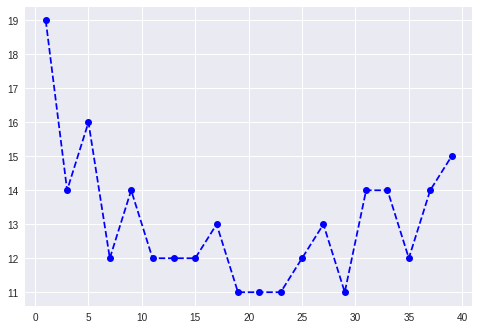

In [ ]:
plt.plot (np.arange(1,40,2), err,color='blue', linestyle='dashed', marker='o',)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19)

In [ ]:
knn.fit (X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
pred = knn.predict (X_test)

In [ ]:
print(confusion_matrix(y_test,pred))

[[134   8]
 [  3 155]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       142
           1       0.95      0.98      0.97       158

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

